<a href="https://colab.research.google.com/github/OlekanmaVictoria/Data-science-Portfolio/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAR PRICE PREDICTION MODEL**

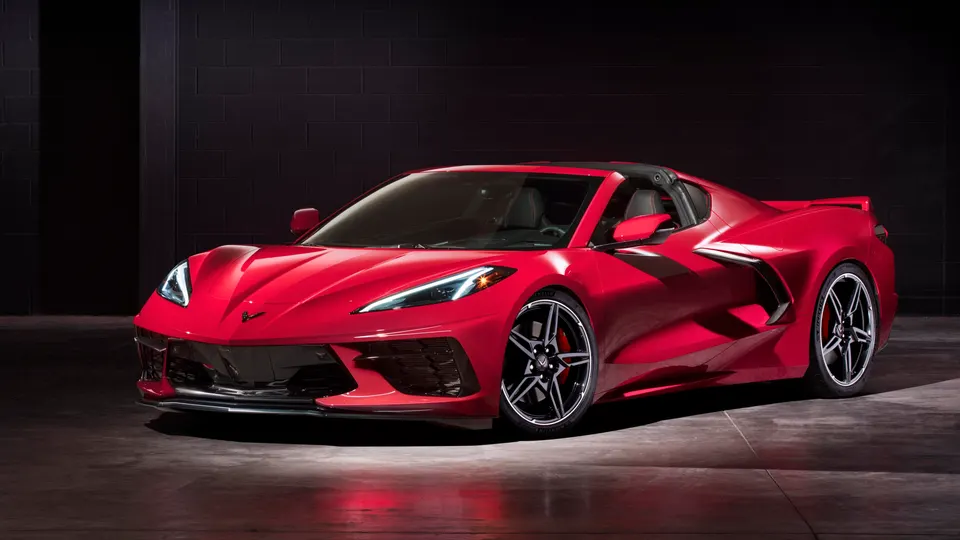

**PROBLEM STATEMENT**

 The price of a car depends on many factors, such as the brand's reputation, features, horsepower, mileage, and more.

Car price prediction is a significant area in machine learning.

It falls under the finance and marketing domain because the price of a car depends on factors like horsepower, brand, model, mileage, safety features, GPS, and more.

A car manufacturer primarily determines the price of a car based on the features it offers to customers.

Later, the brand may raise the price based on its reputation, but the most important factors are the features a car provides to add value to your life.

Thus, the problem statement for this analysis is to "predict car prices."

DATA SOURCE:KAGGLE.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
data = pd.read_csv("CarPrice.csv")
data



,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data.shape()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0     False      False    False     False       False       False    False   
1     False      False    False     False       False       False    False   
2     False      False    False     False       False       False    False   
3     False      False    False     False       False       False    False   
4     False      False    False     False       False       False    False   
..      ...        ...      ...       ...         ...         ...      ...   
200   False      False    False     False       False       False    False   
201   False      False    False     False       False       False    False   
202   False      False    False     False       False       False    False   
203   False      False    False     False       False       False    False   
204   False      False    False     False       False       False    False   

 

# There are no missing data in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
print(data.describe())

           car_ID   symboling   wheelbase  ...     citympg  highwaympg         price
count  205.000000  205.000000  205.000000  ...  205.000000  205.000000    205.000000
mean   103.000000    0.834146   98.756585  ...   25.219512   30.751220  13276.710571
std     59.322565    1.245307    6.021776  ...    6.542142    6.886443   7988.852332
min      1.000000   -2.000000   86.600000  ...   13.000000   16.000000   5118.000000
25%     52.000000    0.000000   94.500000  ...   19.000000   25.000000   7788.000000
50%    103.000000    1.000000   97.000000  ...   24.000000   30.000000  10295.000000
75%    154.000000    2.000000  102.400000  ...   30.000000   34.000000  16503.000000
max    205.000000    3.000000  120.900000  ...   49.000000   54.000000  45400.000000

[8 rows x 16 columns]


In [ ]:
data.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [ ]:
data.horsepower.unique()

array([111, 154, 102, 115, 110, 140, 160, 101, 121, 182,  48,  70,  68,
        88, 145,  58,  76,  60,  86, 100,  78,  90, 176, 262, 135,  84,
        64, 120,  72, 123, 155, 184, 175, 116,  69,  55,  97, 152, 200,
        95, 142, 143, 207, 288,  73,  82,  94,  62,  56, 112,  92, 161,
       156,  52,  85, 114, 162, 134, 106])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


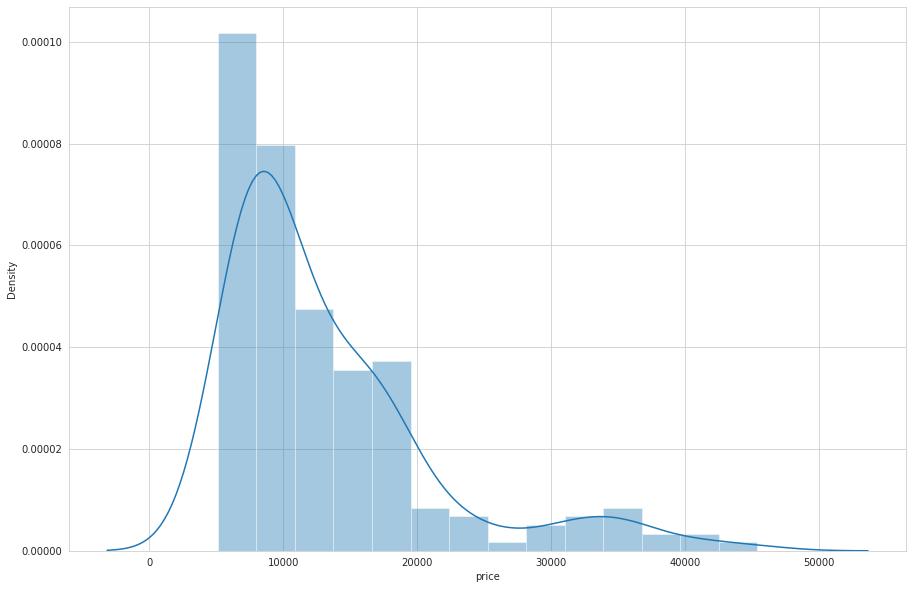

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
sns.distplot(data.price)
plt.show()

In [ ]:
print(data.corr())

                    car_ID  symboling  ...  highwaympg     price
car_ID            1.000000  -0.151621  ...    0.011255 -0.109093
symboling        -0.151621   1.000000  ...    0.034606 -0.079978
wheelbase         0.129729  -0.531954  ...   -0.544082  0.577816
carlength         0.170636  -0.357612  ...   -0.704662  0.682920
carwidth          0.052387  -0.232919  ...   -0.677218  0.759325
carheight         0.255960  -0.541038  ...   -0.107358  0.119336
curbweight        0.071962  -0.227691  ...   -0.797465  0.835305
enginesize       -0.033930  -0.105790  ...   -0.677470  0.874145
boreratio         0.260064  -0.130051  ...   -0.587012  0.553173
stroke           -0.160824  -0.008735  ...   -0.043931  0.079443
compressionratio  0.150276  -0.178515  ...    0.265201  0.067984
horsepower       -0.015006   0.070873  ...   -0.770544  0.808139
peakrpm          -0.203789   0.273606  ...   -0.054275 -0.085267
citympg           0.015940  -0.035823  ...    0.971337 -0.685751
highwaympg        0.01125

I just built a model to predict cars and their prices,from the above built model,I can deduce that car prices are as a result of so many attributes;the feul it consumes,horse powerE.T.C
I successfully plotted  graphs; the displot  chart showing the statistical distribution of the prices of the Car above,then a heatmap chart to show correlations points between cars and their prices.

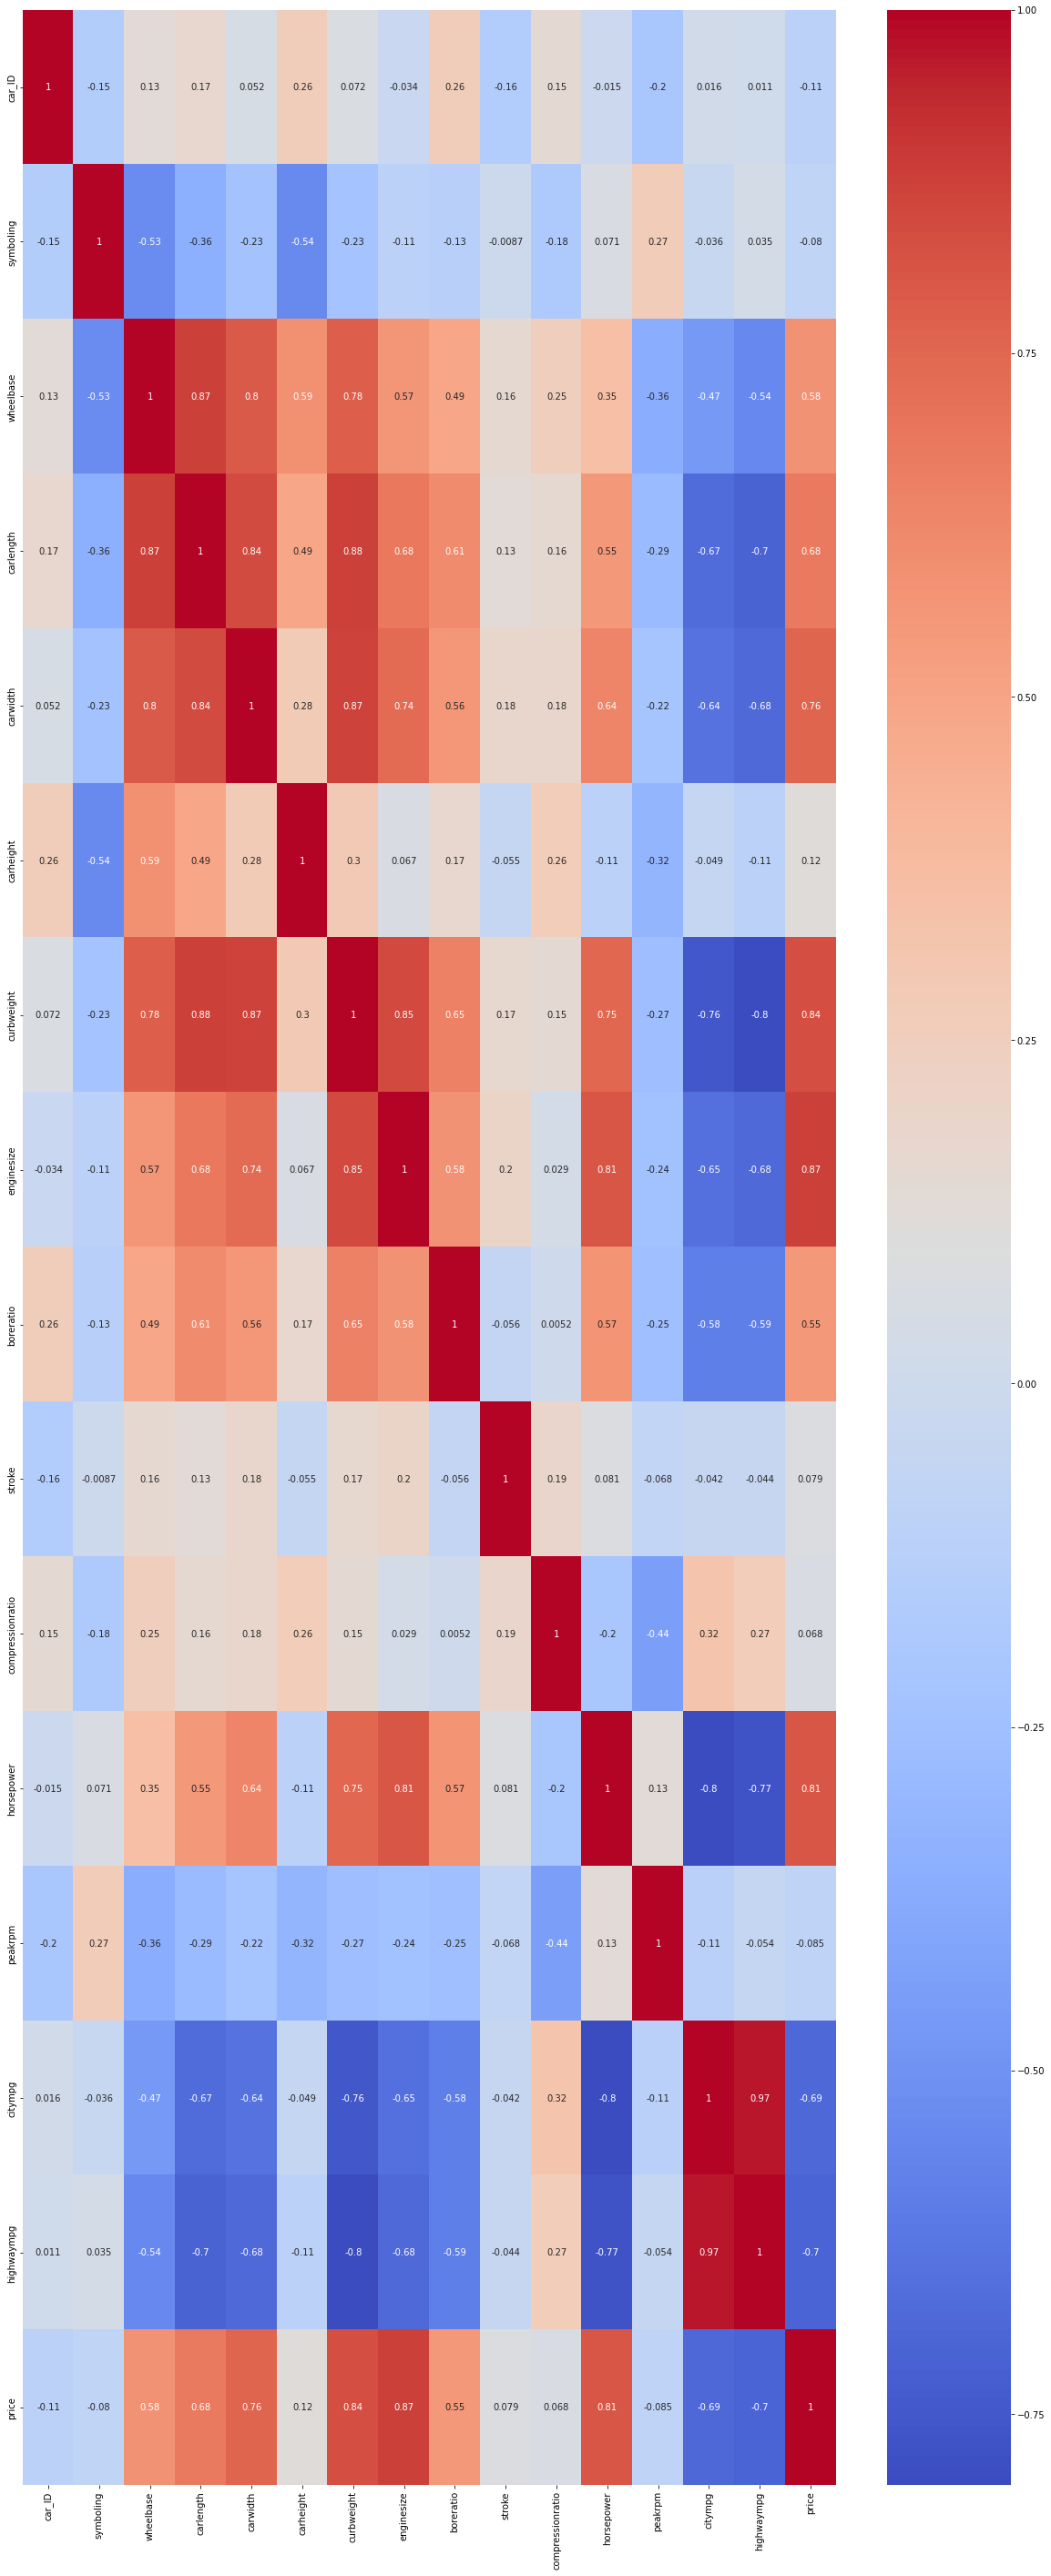

In [ ]:
plt.figure(figsize=(20,50))
correlations = data.corr()
sns.heatmap(correlations,cmap="coolwarm",annot=True)
plt.show()

TRAINING A CAR PRICE PRIDICTION MODEL.
Using the decision tree regression Algorithm to train a car price prediction model.So let's split the data into training and testing sets using the decision algorithm to train the model.

In [ ]:
predict = "price"

In [ ]:
data =[["symboling","wheelbase","carelength","carwidth","carheight","price","stroke","compressionratio","enginesize","boreratio","stroke","peakrpm","citympg"]]

In [ ]:
import array

In [ ]:
data.drop(columns = "price")

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [ ]:
x = np.array(data.drop(columns ="price"))

In [ ]:
y = np.array(data['price'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
string = "xtrain"

In [ ]:
print(string)

xtrain


In [ ]:
print(type(string))

<class 'str'>


*Findings*:


The prices of Cars are as a result of some factors just like stated above,the above analysis shows thus.
The Horse power
The car Id
Carwidth
Carheight
Enginesize
Symboling
CLINDERNUMBER